In [248]:
import csv
import pandas as pd
import numpy as np
data = pd.read_csv("/home/afla/Documents/datasets/7282_1.csv")
data.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35912 entries, 0 to 35911
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   address               35912 non-null  object 
 1   categories            35912 non-null  object 
 2   city                  35912 non-null  object 
 3   country               35912 non-null  object 
 4   latitude              35826 non-null  float64
 5   longitude             35826 non-null  float64
 6   name                  35912 non-null  object 
 7   postalCode            35857 non-null  object 
 8   province              35912 non-null  object 
 9   reviews.date          35653 non-null  object 
 10  reviews.dateAdded     35912 non-null  object 
 11  reviews.doRecommend   0 non-null      float64
 12  reviews.id            0 non-null      float64
 13  reviews.rating        35050 non-null  float64
 14  reviews.text          35890 non-null  object 
 15  reviews.title      

In [250]:
my_data = data[["reviews.text", "reviews.title",'reviews.rating']]
my_data = my_data.dropna()
my_data

,reviews.text,reviews.title,reviews.rating
0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,4.0
1,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,5.0
2,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,5.0
3,We stayed here for four nights in October. The...,Good location on the Lido.,5.0
4,We stayed here for four nights in October. The...,������ ���������������,5.0
...,...,...,...
35905,We truly enjoyed staying at the Elk Springs re...,We Loved It!,5.0
35906,We were here for a 2nd time the last weekend o...,Amazing time (both times!!),5.0
35907,Best of the Best!!!! My family and I stayed in...,Amazing time (both times!!),5.0
35908,Amazing Vacation in Beautiful Cabin We stayed ...,Amazing time (both times!!),5.0


In [251]:
my_data["reviews.text"] = my_data["reviews.text"].apply(lambda x: " ".join(x.lower() for x in  str(x).split()))

In [252]:
my_data["reviews.text"] = my_data["reviews.text"].str.replace(r'[^\w\s]' , " ")

In [253]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
my_data["reviews.text"] = my_data["reviews.text"].apply(lambda x: " ".join(x for x in x.split() if not x in stop_words))

In [254]:
from textblob import Word
my_data["reviews.text"] = my_data["reviews.text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [255]:
my_data_ = my_data
my_data_["reviews.rating"] = my_data_["reviews.rating"].astype(int)
my_data_.groupby("reviews.rating").count()
my_data

,reviews.text,reviews.title,reviews.rating
0,pleasant 10 min walk along sea front water bus...,Good location away from the crouds,4
1,really lovely hotel stayed top floor surprised...,Great hotel with Jacuzzi bath!,5
2,ett mycket bra hotell det som drog ner betyget...,Lugnt l��ge,5
3,stayed four night october hotel staff welcomin...,Good location on the Lido.,5
4,stayed four night october hotel staff welcomin...,������ ���������������,5
...,...,...,...
35905,truly enjoyed staying elk spring resort quiet ...,We Loved It!,5
35906,2nd time last weekend april stayed deer heart ...,Amazing time (both times!!),5
35907,best best family stayed grin bear cabin christ...,Amazing time (both times!!),5
35908,amazing vacation beautiful cabin stayed long w...,Amazing time (both times!!),5


In [256]:
row1 = my_data_[my_data_["reviews.rating"] == 1]
row2 = my_data_[my_data_["reviews.rating"] == 2]
row3 = my_data_[my_data_["reviews.rating"] == 3]
row4 = my_data_[my_data_["reviews.rating"] == 4]
row5 = my_data_[my_data_["reviews.rating"] == 5]
row1
my_data_ = pd.concat([row1,row2,row3,row4,row5], axis=0)

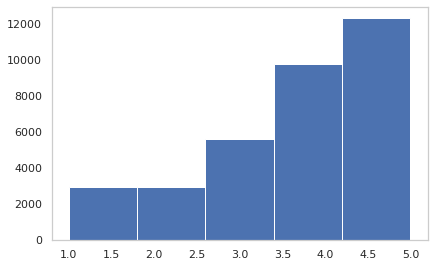

                reviews.text  reviews.title
reviews.rating                             
1                       2986           2986
2                       2973           2973
3                       5649           5649
4                       9787           9787
5                      12334          12334


In [257]:
import matplotlib.pyplot as plt
my_data_["reviews.rating"].hist(bins= 5 , grid = False)
plt.show()
print(my_data_.groupby("reviews.rating").count())

In [269]:
row1 = my_data_[my_data_["reviews.rating"] == 1].sample(n =2900)
row2 = my_data_[my_data_["reviews.rating"] == 2].sample(n =2900)
row3 = my_data_[my_data_["reviews.rating"] == 3].sample(n =2900)
row4 = my_data_[my_data_["reviews.rating"] == 4].sample(n =2900)
row5 = my_data_[my_data_["reviews.rating"] == 5].sample(n =2900)
my_data_ = pd.concat([row1,row2,row3,row4,row5], axis=0)
#برای حذف index
my_data_.reset_index(drop = True , inplace = True)

In [270]:
my_data_

,reviews.text,reviews.title,reviews.rating
0,gps wrong follow sign first get 81 right,Great place is tyou enjoy smoking!,1
1,dirty bad hotel hotel expedia list,Terrible Hotel,1
2,well must midst renovation tell customer dust ...,Waterville Grand Hotel,1
3,room comfortable clean staff peasant great sta...,business stay,1
4,stay 4 day family vacation u housekeeper femal...,Worst vacation Ever,1
...,...,...,...
14495,free cooky last free pancake starting 8pm midn...,Great hotel and staff,5
14496,3 x easy freeway great choice food around pup ...,Great location from highway,5
14497,everything stay hampton inn top notch exceptio...,A gem of a Hampton Inn,5
14498,nice stop road trip comfortable hotel spend da...,A nice stop on the road trip,5


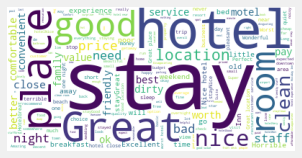

In [273]:
text_str = my_data_["reviews.title"].str.cat()

from wordcloud import WordCloud
wordcloud = WordCloud(background_color ='white').generate(text_str)
plt.figure(figsize = (4, 4), facecolor = None )
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# My Idea

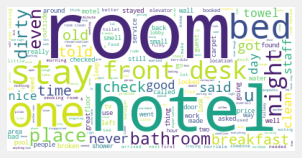

In [278]:
a1 = my_data_[my_data_["reviews.rating"] == 2]
a2 = my_data_[my_data_["reviews.rating"] == 1]
N  = pd.concat([a1 , a2], axis=0)
N_str = N["reviews.text"].str.cat()
wordcloud = WordCloud(background_color ='white').generate(N_str)
plt.figure(figsize = (4, 4), facecolor = None )
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

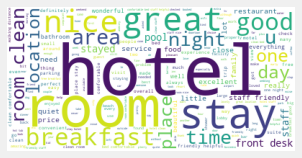

In [279]:
a1 = my_data_[my_data_["reviews.rating"] == 4]
a2 = my_data_[my_data_["reviews.rating"] == 5]
P  = pd.concat([a1 , a2], axis=0)
P_str = P["reviews.text"].str.cat()
wordcloud = WordCloud(background_color ='white').generate(P_str)
plt.figure(figsize = (4, 4), facecolor = None )
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# II 

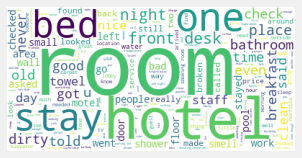

In [288]:
N1 = my_data_[my_data_["reviews.rating"].isin([1,2])]
P1 = my_data_[my_data_["reviews.rating"].isin([4,5])]
N1_str = N1["reviews.text"].str.cat()
P2_str = P1["reviews.text"].str.cat()
# و مثل بالا نمودارش رسم می شود
wordcloud = WordCloud(background_color ='white').generate(N1_str)

plt.figure(figsize = (4, 4), facecolor = None )
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
plt.style.use("fivethirtyeight")

In [289]:
from nltk.sentiment import SentimentIntensityAnalyzer
Analiz = SentimentIntensityAnalyzer()
B = []
for i in my_data_["reviews.text"]:
    vs = Analiz.polarity_scores(i)
    B.append(vs)


In [290]:
b = pd.DataFrame(my_data_.index)
B_pandas = pd.DataFrame(B , index = b[0])
B_pandas

,neg,neu,pos,compound
0,,,,
0,0.307,0.693,0.000,-0.4767
1,0.615,0.385,0.000,-0.7506
2,0.102,0.674,0.224,0.7839
3,0.000,0.448,0.552,0.9896
4,0.101,0.666,0.233,0.7964
...,...,...,...,...
14495,0.000,0.577,0.423,0.7650
14496,0.069,0.364,0.567,0.9286
14497,0.000,0.506,0.494,0.9701


In [291]:
out_data = pd.concat([my_data_ , B_pandas], axis = 1)
print(my_data_.shape,B_pandas.shape)
#pd.concat([df1, df4], axis=1)df4.reindex(df1.index), join="inner"

(14500, 3) (14500, 4)


In [292]:
out_data.head(100)

,reviews.text,reviews.title,reviews.rating,neg,neu,pos,compound
0,gps wrong follow sign first get 81 right,Great place is tyou enjoy smoking!,1,0.307,0.693,0.000,-0.4767
1,dirty bad hotel hotel expedia list,Terrible Hotel,1,0.615,0.385,0.000,-0.7506
2,well must midst renovation tell customer dust ...,Waterville Grand Hotel,1,0.102,0.674,0.224,0.7839
3,room comfortable clean staff peasant great sta...,business stay,1,0.000,0.448,0.552,0.9896
4,stay 4 day family vacation u housekeeper femal...,Worst vacation Ever,1,0.101,0.666,0.233,0.7964
...,...,...,...,...,...,...,...
95,ended staying due mean construction room horri...,never again,1,0.233,0.600,0.167,-0.2500
96,unhappy started game regarding fact wanted mon...,STAY AWAY - POOR CHOICE,1,0.217,0.674,0.109,-0.7717
97,place need active management place horrible tr...,Wet sheep dog.,1,0.161,0.645,0.194,0.1027
98,get refund plus leak room staff helpful helpfu...,No refund,1,0.134,0.483,0.384,0.8316


In [293]:
out_data["oppanion"]= np.where(out_data['compound'] >= 0.5, 'Posetiv' , 'Negetiv')

In [294]:
out_data

,reviews.text,reviews.title,reviews.rating,neg,neu,pos,compound,oppanion
0,gps wrong follow sign first get 81 right,Great place is tyou enjoy smoking!,1,0.307,0.693,0.000,-0.4767,Negetiv
1,dirty bad hotel hotel expedia list,Terrible Hotel,1,0.615,0.385,0.000,-0.7506,Negetiv
2,well must midst renovation tell customer dust ...,Waterville Grand Hotel,1,0.102,0.674,0.224,0.7839,Posetiv
3,room comfortable clean staff peasant great sta...,business stay,1,0.000,0.448,0.552,0.9896,Posetiv
4,stay 4 day family vacation u housekeeper femal...,Worst vacation Ever,1,0.101,0.666,0.233,0.7964,Posetiv
...,...,...,...,...,...,...,...,...
14495,free cooky last free pancake starting 8pm midn...,Great hotel and staff,5,0.000,0.577,0.423,0.7650,Posetiv
14496,3 x easy freeway great choice food around pup ...,Great location from highway,5,0.069,0.364,0.567,0.9286,Posetiv
14497,everything stay hampton inn top notch exceptio...,A gem of a Hampton Inn,5,0.000,0.506,0.494,0.9701,Posetiv
14498,nice stop road trip comfortable hotel spend da...,A nice stop on the road trip,5,0.144,0.458,0.399,0.5994,Posetiv


In [295]:
PN = out_data["oppanion"].value_counts()

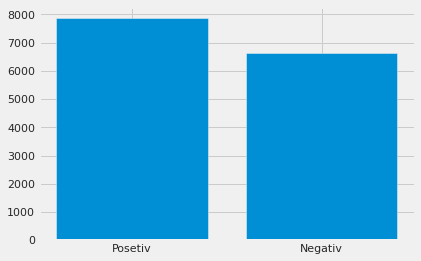

In [296]:
import matplotlib.pyplot as plt
fig = plt.figure()
langs = [ 'Posetiv' ,'Negativ']
plt.bar(langs,PN)
plt.show()